In [2]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=05f72413e753e168c27d9fa74eea379ff01cd1d5607b858a2c9e41ebdfdb915d
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# New Section

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from pyspark.sql import DataFrame

In [6]:
df_com = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load("Top2000CompaniesGlobally.csv")
df_com.cache()
df_com.show()

+-----------+--------------------+----------------+------------------+-----------------+-----------------------+---------------+-------------+----------+----------+
|Global Rank|             Company|Sales ($billion)|Profits ($billion)|Assets ($billion)|Market Value ($billion)|        Country|    Continent|  Latitude| Longitude|
+-----------+--------------------+----------------+------------------+-----------------+-----------------------+---------------+-------------+----------+----------+
|          1|                ICBC|           134.8|              37.8|           2813.5|                  237.3|          China|         Asia|  35.86166|104.195397|
|          2|China Constructio...|           113.1|              30.6|           2241.0|                  202.0|          China|         Asia|  35.86166|104.195397|
|          3|      JPMorgan Chase|           108.2|              21.3|           2359.1|                  191.4|            USA|North America|  37.09024|-95.712891|
|         

In [7]:
df_com.printSchema()

root
 |-- Global Rank: integer (nullable = true)
 |-- Company: string (nullable = true)
 |-- Sales ($billion): double (nullable = true)
 |-- Profits ($billion): double (nullable = true)
 |-- Assets ($billion): double (nullable = true)
 |-- Market Value ($billion): double (nullable = true)
 |-- Country: string (nullable = true)
 |-- Continent: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)



In [8]:
df_com.describe().show()

+-------+-----------------+--------------------+------------------+------------------+-----------------+-----------------------+---------+-------------+------------------+------------------+
|summary|      Global Rank|             Company|  Sales ($billion)|Profits ($billion)|Assets ($billion)|Market Value ($billion)|  Country|    Continent|          Latitude|         Longitude|
+-------+-----------------+--------------------+------------------+------------------+-----------------+-----------------------+---------+-------------+------------------+------------------+
|  count|             1924|                1924|              1924|              1924|             1924|                   1924|     1924|         1924|              1924|              1924|
|   mean|997.2328482328483|                NULL|19.265904365904273|1.2260395010395047|79.50779625779606|     19.558160083160104|     NULL|         NULL|34.618746549376155|15.455664304573906|
| stddev|575.5027807871161|                NU

In [9]:
df_com.createOrReplaceTempView("data")

In [10]:
df = spark.sql("SELECT `Market Value ($billion)` as Market_Values,`Sales ($billion)` as Sales FROM data")
df.show(5)

+-------------+-----+
|Market_Values|Sales|
+-------------+-----+
|        237.3|134.8|
|        202.0|113.1|
|        191.4|108.2|
|        243.7|147.4|
|        400.4|420.7|
+-------------+-----+
only showing top 5 rows



In [11]:
df.select('Sales').distinct().orderBy('Sales').show(1000,False)

+-----+
|Sales|
+-----+
|0.0  |
|0.2  |
|0.3  |
|0.4  |
|0.5  |
|0.6  |
|0.7  |
|0.8  |
|0.9  |
|1.0  |
|1.1  |
|1.2  |
|1.3  |
|1.4  |
|1.5  |
|1.6  |
|1.7  |
|1.8  |
|1.9  |
|2.0  |
|2.1  |
|2.2  |
|2.3  |
|2.4  |
|2.5  |
|2.6  |
|2.7  |
|2.8  |
|2.9  |
|3.0  |
|3.1  |
|3.2  |
|3.3  |
|3.4  |
|3.5  |
|3.6  |
|3.7  |
|3.8  |
|3.9  |
|4.0  |
|4.1  |
|4.2  |
|4.3  |
|4.4  |
|4.5  |
|4.6  |
|4.7  |
|4.8  |
|4.9  |
|5.0  |
|5.1  |
|5.2  |
|5.3  |
|5.4  |
|5.5  |
|5.6  |
|5.7  |
|5.8  |
|5.9  |
|6.0  |
|6.1  |
|6.2  |
|6.3  |
|6.4  |
|6.5  |
|6.6  |
|6.7  |
|6.8  |
|6.9  |
|7.0  |
|7.1  |
|7.2  |
|7.3  |
|7.4  |
|7.5  |
|7.6  |
|7.7  |
|7.8  |
|7.9  |
|8.0  |
|8.1  |
|8.2  |
|8.3  |
|8.4  |
|8.5  |
|8.6  |
|8.7  |
|8.8  |
|8.9  |
|9.0  |
|9.1  |
|9.2  |
|9.3  |
|9.4  |
|9.5  |
|9.6  |
|9.7  |
|9.8  |
|9.9  |
|10.0 |
|10.1 |
|10.2 |
|10.3 |
|10.4 |
|10.5 |
|10.6 |
|10.7 |
|10.8 |
|10.9 |
|11.0 |
|11.1 |
|11.2 |
|11.3 |
|11.4 |
|11.5 |
|11.6 |
|11.7 |
|11.8 |
|11.9 |
|12.0 |
|12.1 |
|12.2 |


In [12]:
df.select('Market_Values').distinct().orderBy('Market_Values').show(1000,False)

+-------------+
|Market_Values|
+-------------+
|0.0          |
|0.1          |
|0.2          |
|0.3          |
|0.4          |
|0.5          |
|0.6          |
|0.7          |
|0.8          |
|0.9          |
|1.0          |
|1.1          |
|1.2          |
|1.3          |
|1.4          |
|1.5          |
|1.6          |
|1.7          |
|1.8          |
|1.9          |
|2.0          |
|2.1          |
|2.2          |
|2.3          |
|2.4          |
|2.5          |
|2.6          |
|2.7          |
|2.8          |
|2.9          |
|3.0          |
|3.1          |
|3.2          |
|3.3          |
|3.4          |
|3.5          |
|3.6          |
|3.7          |
|3.8          |
|3.9          |
|4.0          |
|4.1          |
|4.2          |
|4.3          |
|4.4          |
|4.5          |
|4.6          |
|4.7          |
|4.8          |
|4.9          |
|5.0          |
|5.1          |
|5.2          |
|5.3          |
|5.4          |
|5.5          |
|5.6          |
|5.7          |
|5.8          |
|5.9    

In [13]:
df.createOrReplaceTempView("split_data")
X = spark.sql("SELECT DOUBLE(Sales) FROM split_data")
y = spark.sql("SELECT DOUBLE(Market_Values) FROM split_data")

In [14]:
X_train, X_test = X.randomSplit([0.7, 0.3], seed = 2)
y_train, y_test = y.randomSplit([0.7, 0.3], seed = 2)

In [15]:
X_train_values = np.array(X_train.rdd.map(lambda x: x[0]).collect())
y_train_values = np.array(y_train.rdd.map(lambda x: x[0]).collect())
X_test_values = np.array(X_test.rdd.map(lambda x: x[0]).collect())

In [16]:
def mean(data):
    return np.mean(data)

In [17]:
def deno_slope(data, mean):
    return np.sum((data - mean) ** 2)

In [18]:
# Hàm tính tử số
def nume_slope(X, mean_X, y, mean_y):
    common_array = np.column_stack((X, y))
    return np.sum((common_array[:, 0] - mean_X) * (common_array[:, 1] - mean_y))

In [19]:
# Hàm tính hệ số B0, B1 của Ridge Regression
def coefficients(X, y, lambda_param):
    X_mean, y_mean = mean(X), mean(y)
    b1_nume = nume_slope(X, X_mean, y, y_mean)
    b1_deno = deno_slope(X, X_mean) + lambda_param
    b1 = b1_nume / b1_deno
    b0 = y_mean - b1 * X_mean
    return b0, b1

In [20]:
# Hàm dự đoán
def predict(X, b0, b1):
    return X * b1 + b0

In [21]:
# Hàm tính hàm loss
def ridge_loss(X, y, b0, b1, lambda_param):
    y_pred = predict(X, b0, b1)
    loss = np.mean((y_pred - y) ** 2) + lambda_param * b1 ** 2
    return loss

In [22]:
# Lựa chọn tham số lambda
lambda_param = 0.1

In [23]:
# Tính hệ số B0, B1 của Ridge Regression
b0, b1 = coefficients(X_train_values, y_train_values, lambda_param)

In [24]:
# Tính hàm loss trên tập huấn luyện
loss_train = ridge_loss(X_train_values, y_train_values, b0, b1, lambda_param)

In [25]:
# Tính hàm loss trên tập kiểm thử
loss_test = ridge_loss(X_test_values, y_test.rdd.map(lambda x: x[0]).collect(), b0, b1, lambda_param)

In [26]:
print(f"Intercept (B0): {b0}")
print(f"Slope (B1): {b1}")
print(f"Loss on training set: {loss_train}")
print(f"Loss on testing set: {loss_test}")

Intercept (B0): 2.10535934090683
Slope (B1): 0.8938019943566647
Loss on training set: 53.31384670733413
Loss on testing set: 49.63025683471783


In [27]:
# Hàm tính RMSE
def rmse_metric(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

In [28]:
# Hàm đánh giá mô hình dự đoán
def evaluate_model(X, y, b0, b1):
    y_pred = predict(X, b0, b1)
    rmse = rmse_metric(y, y_pred)
    return rmse

In [29]:
# Đánh giá mô hình trên tập huấn luyện
rmse_train = evaluate_model(X_train_values, y_train_values, b0, b1)

In [30]:
# Đánh giá mô hình trên tập kiểm thử
rmse_test = evaluate_model(X_test_values, y_test.rdd.map(lambda x: x[0]).collect(), b0, b1)

print(f"RMSE on training set: {rmse_train}")
print(f"RMSE on testing set: {rmse_test}")

RMSE on training set: 7.296160531870344
RMSE on testing set: 7.039202272573664


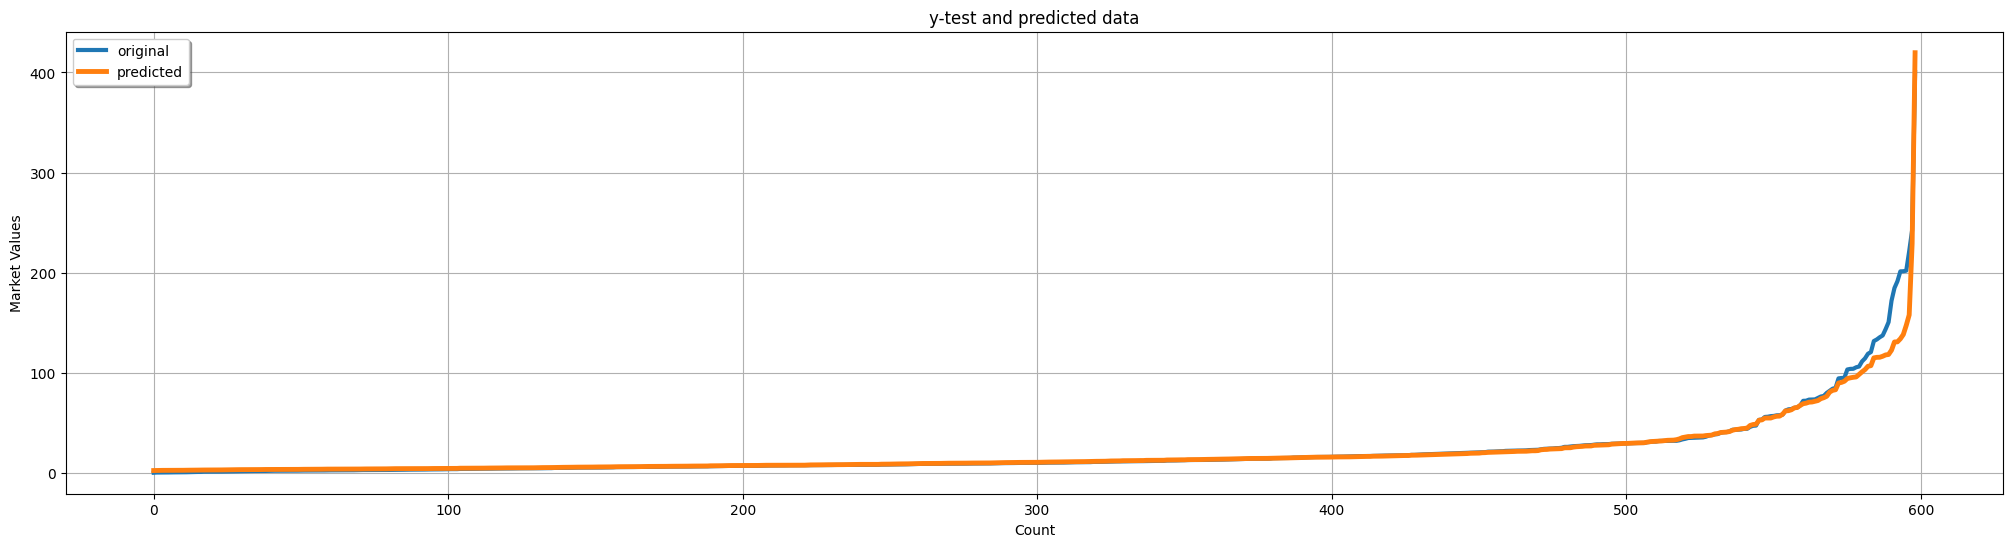

In [31]:
# Trực quan hóa so sánh kết quả trên tập test và kết quả dự đoán
x_ax = range(len(X_test_values))
y_test_values = y_test.rdd.map(lambda x: x[0]).collect()
y_pred_values = predict(X_test_values, b0, b1)

plt.figure(figsize=(25, 6))
plt.plot(x_ax, y_test_values, linewidth=3, label="original")
plt.plot(x_ax, y_pred_values, linewidth=3.5, label="predicted")
plt.title("y-test and predicted data")
plt.xlabel('Count')
plt.ylabel('Market Values')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()